In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
sns.set(color_codes=True)

STARTING THE ANALYSIS

In [2]:
df_agric=pd.read_csv("na-nov2021-agriculture-csv.csv")
df_capital=pd.read_csv("na-nov2021-capital-stocks-csv.csv")
df_gdp=pd.read_csv("na-nov2021-gdp-breakdown-csv.csv")
df_hce=pd.read_csv("na-nov2021-hce-csv.csv")
df_instit=pd.read_csv("na-nov2021-institutional-sectors-csv.csv")
df_percapita=pd.read_csv("na-nov2021-percapita-csv.csv")
df_taxes=pd.read_csv("na-nov2021-taxes-csv.csv")

In [3]:
# You can append on frame to another but is an old method and hard way.
df=df_agric.append(df_percapita, ignore_index=True)
df.head(4)

C:\Users\StarCJ\AppData\Local\Temp\ipykernel_14060\3493779996.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_agric.append(df_percapita, ignore_index=True)


,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,SNEA.SG01NAC16P10A11,2007.03,526,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
1,SNEA.SG01NAC16P10A11,2008.03,482,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
2,SNEA.SG01NAC16P10A11,2009.03,404,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
3,SNEA.SG01NAC16P10A11,2010.03,450,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN


In [4]:
# another way to join frames and best way, it will join the frames at once. It join after last row
frames=pd.concat([df_agric,df_capital,df_gdp,df_hce,df_instit, df_percapita,df_taxes],ignore_index=True)


In [5]:
from matplotlib.pyplot import figure


agric=len(df_agric)
capital=len(df_capital)
gdp=len(df_gdp)
hce=len(df_hce)
instit=len(df_instit)
percapita=len(df_percapita)
taxes=len(df_taxes)


px.pie(names=['Agric','Captial','GDP','HCE','Institution','PerCapita','Taxes'],values=[agric,capital,gdp,hce,instit,percapita,taxes],title="The pie chart of November 2021")

In [6]:
null_value=frames.isnull()
null_value.sum()

Series_reference        0
Period                  0
Data_value           1270
STATUS                  0
UNITS                   0
MAGNTUDE                0
Subject                 0
Group               60034
Series_title_1          0
Series_title_2       3287
Series_title_3      52447
Series_title_4      77630
Series_title_5      94362
dtype: int64

In [7]:
# To remove null values from the frame 
remove_null=frames.dropna()
remove_null.isnull().sum()

Series_reference    0.0
Period              0.0
Data_value          0.0
STATUS              0.0
UNITS               0.0
MAGNTUDE            0.0
Subject             0.0
Group               0.0
Series_title_1      0.0
Series_title_2      0.0
Series_title_3      0.0
Series_title_4      0.0
Series_title_5      0.0
dtype: float64

In [8]:
# Renaming one of the value in the column 
frames=frames.rename(columns={"Data_value":"Value","MAGNTUDE":"Magnitude","Series_reference":"Series"})
frames.describe()

,Period,Value,Magnitude
count,96809.000000,95539.000000,96809.0
mean,1999.634210,12202.316468,6.0
std,13.542289,48564.467409,0.0
min,1972.030000,-41395.000000,6.0
25%,1989.030000,108.000000,6.0
50%,2001.030000,864.000000,6.0
75%,2011.030000,4463.500000,6.0
max,2021.030000,990937.000000,6.0


,Value,Period
Series,,
SNEA.SG07NAC01K90T4,990937.0,2021.03
SNEA.SG07NAC00K90,990937.0,2021.03
SNEA.SG07NAC05K90ZZ99,990937.0,2021.03
SNEA.SG07NAC04K90ZZ9,990937.0,2021.03
SNEA.SG07NAC03K90ZZ,990937.0,2021.03
SNEA.SG07NAC01K90M4,809465.0,2021.03


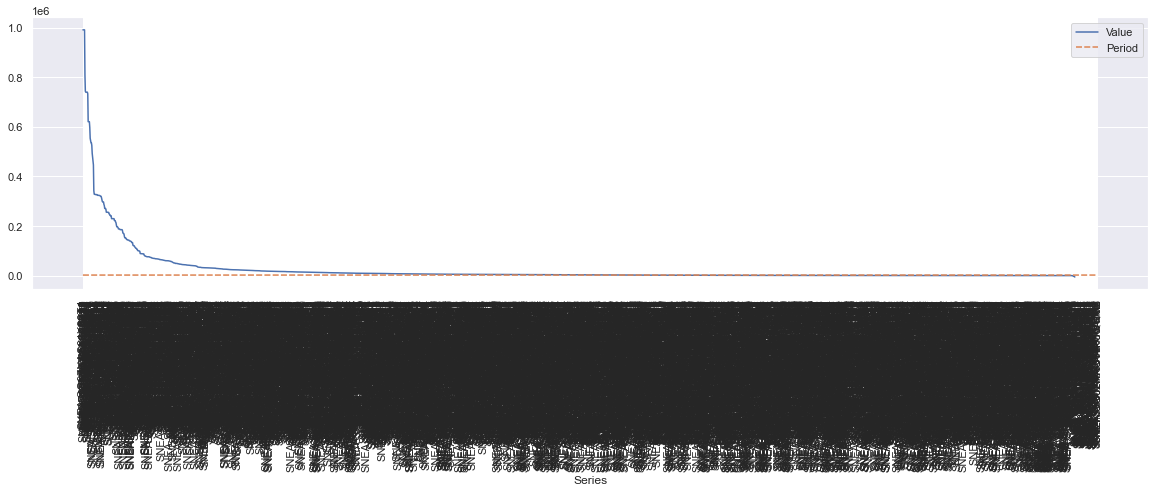

In [9]:
# Line graph of the data_value and using seaborn, seaborn takes time
from itertools import groupby


graph_nov=frames.groupby("Series").max()[["Value","Period"]]  #with the max() code, the series with then show up
graph_nov=graph_nov.sort_values(by=["Value"], ascending=False)  #in arranging in decending order based by Value

plt.figure(figsize=(20,5))
sns.lineplot(data=graph_nov)
plt.xticks(rotation=90)

graph_nov.head(6)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, 'SNEA.SG05NAC04K10AA2'),
  Text(0.0, 0, 'SNEA.SG07NAC01K90T4'),
  Text(500.0, 0, 'SNEA.S2ND6115S500C1'),
  Text(1000.0, 0, 'SNEA.SG07RAC05K90CC51'),
  Text(1500.0, 0, 'SNEA.SG07RAC04K90CC2'),
  Text(2000.0, 0, 'SNEA.SG02NAC04P51CC6'),
  Text(2500.0, 0, 'SNEA.SG01NAC06B01LLN3'),
  Text(3000.0, 0, '')])

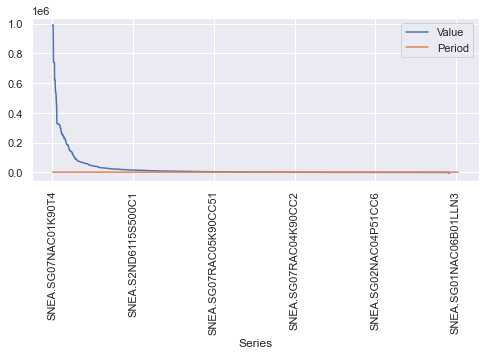

In [10]:
# Another way of plotting the line graph and is very fast and easier

graph_nov.plot.line(figsize=(8,3))
plt.xticks(rotation=90)   #note this will come after the plot, otherwise it will not excute

In [11]:
# To check the date(period), value and status of Series 2 that has cattle
cattle=frames[(frames["Series_title_2"]=="Cattle")][['STATUS','Value','Period']].reset_index()
cattle

,index,STATUS,Value,Period
0,28,FINAL,1948.0,2007.03
1,29,FINAL,1714.0,2008.03
2,30,FINAL,2057.0,2009.03
3,31,FINAL,1848.0,2010.03
4,32,FINAL,2127.0,2011.03
5,33,FINAL,2289.0,2012.03
6,34,FINAL,2316.0,2013.03
7,35,FINAL,2166.0,2014.03
8,36,FINAL,2614.0,2015.03
9,37,FINAL,3074.0,2016.03


In [12]:
# checking for a data  is either Revised or are in all sector 
reserve_sector=frames[(frames["STATUS"]=='REVISED')  | (frames["Series_title_3"]=='All Sectors')].reset_index()
reserve_sector[['STATUS','Series_title_3']].head()

,STATUS,Series_title_3
0,REVISED,NaN
1,REVISED,NaN
2,REVISED,NaN
3,REVISED,NaN
4,REVISED,NaN


THIS IS THE END FOR THE ANALYSIS OF THIS DATA